<a href="https://colab.research.google.com/github/fornieligulo/Analisis_Data_Twitter_BrigadirJ/blob/main/FINAL_SKRIPSI_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Impor Library***

In [15]:
# Import libraries
!pip install nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# ***Load Dataset***

In [16]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('02-Selection-Data.csv')
    return data

data = load_data()
data.head(4)

,date,time,username,tweet,replies_count,retweets_count,likes_count
0,30/08/2022,10:02:37,tvonenews,"Mengejutkan, Kuat Maruf Disebut Lakukan Hubung...",2964,4058,19127
1,15/02/2023,12:38:10,idextratime,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295
2,15/02/2023,12:38:10,idextratime,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295
3,21/09/2022,14:27:25,detikcom,"Polri menyebut AKBP Arif Rahman, saksi kunci o...",2360,1193,5082


In [17]:
#ubah dataframe sesuai column kalian
df  = pd.DataFrame(data[['username','date','time','tweet','replies_count','retweets_count','likes_count']])
df.head(4)

,username,date,time,tweet,replies_count,retweets_count,likes_count
0,tvonenews,30/08/2022,10:02:37,"Mengejutkan, Kuat Maruf Disebut Lakukan Hubung...",2964,4058,19127
1,idextratime,15/02/2023,12:38:10,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295
2,idextratime,15/02/2023,12:38:10,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295
3,detikcom,21/09/2022,14:27:25,"Polri menyebut AKBP Arif Rahman, saksi kunci o...",2360,1193,5082


# ***Cleasing***

In [18]:
import re
import string
import nltk
from nltk.corpus import stopwords


# cleansing data
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

data['cleasing'] = data['tweet'].apply(lambda x: remove_URL(x))
data['cleasing'] = data['cleasing'].apply(lambda x: remove_html(x))
data['cleasing'] = data['cleasing'].apply(lambda x: remove_emoji(x))
data['cleasing'] = data['cleasing'].apply(lambda x: remove_punct(x))
data['cleasing'] = data['cleasing'].apply(lambda x: remove_angka(x))

data.head(2)

,date,time,username,tweet,replies_count,retweets_count,likes_count,cleasing
0,30/08/2022,10:02:37,tvonenews,"Mengejutkan, Kuat Maruf Disebut Lakukan Hubung...",2964,4058,19127,Mengejutkan Kuat Maruf Disebut Lakukan Hubunga...
1,15/02/2023,12:38:10,idextratime,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295,Rekap vonis tersangka kasus Brigadir J sejauh ...


# **Tokenization dan Case Folding**

In [19]:
# case folding
data['Tokenization and Case Folding'] = data['cleasing'].apply(lambda x: x.lower().split())

data.head(2)

,date,time,username,tweet,replies_count,retweets_count,likes_count,cleasing,Tokenization and Case Folding
0,30/08/2022,10:02:37,tvonenews,"Mengejutkan, Kuat Maruf Disebut Lakukan Hubung...",2964,4058,19127,Mengejutkan Kuat Maruf Disebut Lakukan Hubunga...,"[mengejutkan, kuat, maruf, disebut, lakukan, h..."
1,15/02/2023,12:38:10,idextratime,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295,Rekap vonis tersangka kasus Brigadir J sejauh ...,"[rekap, vonis, tersangka, kasus, brigadir, j, ..."


# ***filtering atau stopword removal***

In [20]:
# filtering atau stopword removal
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

data['Filtering/ stopword removal'] = data['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))

data.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,date,time,username,tweet,replies_count,retweets_count,likes_count,cleasing,Tokenization and Case Folding,Filtering/ stopword removal
0,30/08/2022,10:02:37,tvonenews,"Mengejutkan, Kuat Maruf Disebut Lakukan Hubung...",2964,4058,19127,Mengejutkan Kuat Maruf Disebut Lakukan Hubunga...,"[mengejutkan, kuat, maruf, disebut, lakukan, h...","[mengejutkan, kuat, maruf, lakukan, hubungan, ..."
1,15/02/2023,12:38:10,idextratime,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295,Rekap vonis tersangka kasus Brigadir J sejauh ...,"[rekap, vonis, tersangka, kasus, brigadir, j, ...","[rekap, vonis, tersangka, brigadir, j, ferdy, ..."


# ***Steamming Data***

In [21]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.8 MB/s eta 0:00:00


In [22]:
# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# mendefinisikan fungsi untuk membendung teks
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# terapkan stemming ke kolom 'Tweet' dan buat kolom baru 'stemmed_tweet'
data['steaming data'] = data['Filtering/ stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

# melihat 2 baris pertama dari data
data.head(2)

,date,time,username,tweet,replies_count,retweets_count,likes_count,cleasing,Tokenization and Case Folding,Filtering/ stopword removal,steaming data
0,30/08/2022,10:02:37,tvonenews,"Mengejutkan, Kuat Maruf Disebut Lakukan Hubung...",2964,4058,19127,Mengejutkan Kuat Maruf Disebut Lakukan Hubunga...,"[mengejutkan, kuat, maruf, disebut, lakukan, h...","[mengejutkan, kuat, maruf, lakukan, hubungan, ...",kejut kuat maruf laku hubung intim putri candr...
1,15/02/2023,12:38:10,idextratime,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295,Rekap vonis tersangka kasus Brigadir J sejauh ...,"[rekap, vonis, tersangka, kasus, brigadir, j, ...","[rekap, vonis, tersangka, brigadir, j, ferdy, ...",rekap vonis sangka brigadir j ferdy sambo huku...


In [23]:
data.drop_duplicates(subset ="steaming data", keep = 'first', inplace = True)
data.head(2)

,date,time,username,tweet,replies_count,retweets_count,likes_count,cleasing,Tokenization and Case Folding,Filtering/ stopword removal,steaming data
0,30/08/2022,10:02:37,tvonenews,"Mengejutkan, Kuat Maruf Disebut Lakukan Hubung...",2964,4058,19127,Mengejutkan Kuat Maruf Disebut Lakukan Hubunga...,"[mengejutkan, kuat, maruf, disebut, lakukan, h...","[mengejutkan, kuat, maruf, lakukan, hubungan, ...",kejut kuat maruf laku hubung intim putri candr...
1,15/02/2023,12:38:10,idextratime,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295,Rekap vonis tersangka kasus Brigadir J sejauh ...,"[rekap, vonis, tersangka, kasus, brigadir, j, ...","[rekap, vonis, tersangka, brigadir, j, ferdy, ...",rekap vonis sangka brigadir j ferdy sambo huku...


In [ ]:
data.to_csv('Hasi-Preprocessing-Data.csv',encoding='utf8', index=False)

# ***Translate Dataset Bahasa Indonesia Ke Bahasa Indonesia***

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=be7682d8861c3f607639a447d532d59a4a8aa8202fe61d972ca8b4716a2577ad
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans


In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
def load_data():
    data = pd.read_csv('Hasi-Preprocessing-Data.csv')
    return data

tweet_df = load_data()
tweet_df.head(2)

,date,time,username,tweet,replies_count,retweets_count,likes_count,cleasing,Tokenization and Case Folding,Filtering/ stopword removal,steaming data
0,30/08/2022,10:02:37,tvonenews,"Mengejutkan, Kuat Maruf Disebut Lakukan Hubung...",2964,4058,19127,Mengejutkan Kuat Maruf Disebut Lakukan Hubunga...,"['mengejutkan', 'kuat', 'maruf', 'disebut', 'l...","['mengejutkan', 'kuat', 'maruf', 'lakukan', 'h...",kejut kuat maruf laku hubung intim putri candr...
1,15/02/2023,12:38:10,idextratime,Rekap vonis tersangka kasus Brigadir J sejauh ...,2715,4492,37295,Rekap vonis tersangka kasus Brigadir J sejauh ...,"['rekap', 'vonis', 'tersangka', 'kasus', 'brig...","['rekap', 'vonis', 'tersangka', 'brigadir', 'j...",rekap vonis sangka brigadir j ferdy sambo huku...


In [ ]:
tweet_df.drop(tweet_df.columns[[3,7,8,9]], axis = 1, inplace = True)
tweet_df.head(4)

,date,time,username,replies_count,retweets_count,likes_count,steaming data
0,30/08/2022,10:02:37,tvonenews,2964,4058,19127,kejut kuat maruf laku hubung intim putri candr...
1,15/02/2023,12:38:10,idextratime,2715,4492,37295,rekap vonis sangka brigadir j ferdy sambo huku...
2,21/09/2022,14:27:25,detikcom,2360,1193,5082,polri sebut akbp arif rahman saksi kunci obstr...
3,30/08/2022,20:20:23,burhanmuhtadi,1569,11600,35064,sita barang bukti korupsi duta palma trilyunan...


In [ ]:
tweet_df.to_csv('Hasi-Preprocessing-Data-#001.csv',encoding='utf8', index=False)

In [ ]:
def load_data():
    data = pd.read_csv('Hasi-Preprocessing-Data-#001.csv')
    return data

tweet_df = load_data()
tweet_df.head(2)

,date,time,username,replies_count,retweets_count,likes_count,steaming data
0,30/08/2022,10:02:37,tvonenews,2964,4058,19127,kejut kuat maruf laku hubung intim putri candr...
1,15/02/2023,12:38:10,idextratime,2715,4492,37295,rekap vonis sangka brigadir j ferdy sambo huku...


In [ ]:
#ubah dataframe sesuai column kalian
df  = pd.DataFrame(tweet_df[['username','date','time','replies_count','retweets_count','likes_count','steaming data']])
df.head(4)

,username,date,time,replies_count,retweets_count,likes_count,steaming data
0,tvonenews,30/08/2022,10:02:37,2964,4058,19127,kejut kuat maruf laku hubung intim putri candr...
1,idextratime,15/02/2023,12:38:10,2715,4492,37295,rekap vonis sangka brigadir j ferdy sambo huku...
2,detikcom,21/09/2022,14:27:25,2360,1193,5082,polri sebut akbp arif rahman saksi kunci obstr...
3,burhanmuhtadi,30/08/2022,20:20:23,1569,11600,35064,sita barang bukti korupsi duta palma trilyunan...


In [ ]:
translator = Translator()
translations = {}
for column in df.columns:
  unique_elements = df[column].unique()
  for element in unique_elements:
    translations[element] = translator.translate(element).text
translations

{'tvonenews': 'tvonenews',
 'idextratime': 'idextratime',
 'detikcom': 'detikcom',
 'burhanmuhtadi': 'burhanmuhtadi',
 'tanyakanrl': 'ask rl',
 'narasinewsroom': 'narasinewsroom',
 'cnnindonesia': 'cnnindonesia',
 'kompastv': 'kompastv',
 'miduk17': 'we have 17',
 'msaid_didu': 'extended',
 'tijabar': 'Tizabar',
 'metro_tv': 'metro_tv',
 'umar_hasibuan__': 'umar hasibuan',
 'vivacoid': 'vivacoid',
 'convomfs': 'convomfs',
 'catchmeupid': 'catchmeupid',
 'theeagle_ben': 'theeagle_ben',
 'bachrum_achmadi': 'bachrum_achmadi',
 'asumsico': "I don't think so",
 'geloraco': 'surgeco',
 'democrazymedia': 'democrazymedia',
 'papa_loren': 'papa_loren',
 'bospurwa': 'bospurva',
 'abraham_ts': 'Barahmets',
 'dennysiregar7': 'dennysiregar7',
 'zoelhelmilubis1': 'zoelhelmilubis1',
 'oposisicerdas': 'opposition',
 'elfridahutabar5': 'elfridhautabar5',
 'aimanwitjaksono': 'aimanwitjaksono',
 'faktasepakbola': 'facts are pakbola',
 'alextham878': 'extremism',
 'alisyarief': 'Alisyarief',
 'mazzini_gsp

In [ ]:
#mengganti semua kata yang di terjemakan dari kamus original dataframe
df.replace(translations, inplace = True)
df.head(4)

,username,date,time,replies_count,retweets_count,likes_count,steaming data
0,tvonenews,30/08/2022,10:02:37,2964,4058,19127,strong shock maruf conduct sexual intercourse ...
1,idextratime,15/02/2023,12:38:10,2715,4492,37295,recap of verdicts suspected of brigadier j fer...
2,detikcom,21/09/2022,14:27:25,2360,1193,5082,National Police call AKBP Arif Rahman key witn...
3,burhanmuhtadi,30/08/2022,20:20:23,1569,11600,35064,confiscation of evidence of corruption in the ...


In [ ]:
df.to_csv('Hasil-Translate-Data-#002.csv',encoding='utf8', index=False)

# ***Labbeling Data***

In [3]:
def load_data():
    data = pd.read_csv('Hasil-Translate-Data-#002.csv')
    return data

tweet_df = load_data()
tweet_df.head(4)

,username,date,time,replies_count,retweets_count,likes_count,steaming data
0,tvonenews,30/08/2022,10:02:37,2964,4058,19127,strong shock maruf conduct sexual intercourse ...
1,idextratime,15/02/2023,12:38:10,2715,4492,37295,recap of verdicts suspected of brigadier j fer...
2,detikcom,21/09/2022,14:27:25,2360,1193,5082,National Police call AKBP Arif Rahman key witn...
3,burhanmuhtadi,30/08/2022,20:20:23,1569,11600,35064,confiscation of evidence of corruption in the ...


In [4]:
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


In [5]:
scores = [analyser.polarity_scores(x) for x in tweet_df['steaming data']]
print(scores)
tweet_df['Compound_Score'] = [x['compound'] for x in scores]

tweet_df.head(5)

[{'neg': 0.254, 'neu': 0.603, 'pos': 0.142, 'compound': -0.3818}, {'neg': 0.26, 'neu': 0.571, 'pos': 0.169, 'compound': -0.6369}, {'neg': 0.272, 'neu': 0.612, 'pos': 0.116, 'compound': -0.5574}, {'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.5994}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.7845}, {'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.6808}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.549, 'neu': 0.451, 'pos': 0.0, 'compound': -0.8074}, {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.8779}, {'neg': 0.431, 'neu': 0.536, 'pos': 0.033, 'compound': -0.9485}, {'neg': 0.484, 'neu': 0.516, 'pos': 0.0, 'compound': -0.8176}, {'neg': 0.128, 'neu': 0.601, 'pos': 0.27, 'compound': 0.6369}, {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.6124}, {'neg': 0.283, 'neu': 0.717, 'pos': 0.0, 'compound': -0.7964}, {'neg': 0.366, 'neu': 0.554, 'pos': 0.08, 'compound': -0.8519}, 

,username,date,time,replies_count,retweets_count,likes_count,steaming data,Compound_Score
0,tvonenews,30/08/2022,10:02:37,2964,4058,19127,strong shock maruf conduct sexual intercourse ...,-0.3818
1,idextratime,15/02/2023,12:38:10,2715,4492,37295,recap of verdicts suspected of brigadier j fer...,-0.6369
2,detikcom,21/09/2022,14:27:25,2360,1193,5082,National Police call AKBP Arif Rahman key witn...,-0.5574
3,burhanmuhtadi,30/08/2022,20:20:23,1569,11600,35064,confiscation of evidence of corruption in the ...,-0.5994
4,ask rl,22/02/2023,18:40:03,1527,271,7793,Tanyral Bharad is pollary guys wa dya t,0.0000


In [6]:
tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
tweet_df.head(10)

,username,date,time,replies_count,retweets_count,likes_count,steaming data,Compound_Score,Sentiments
0,tvonenews,30/08/2022,10:02:37,2964,4058,19127,strong shock maruf conduct sexual intercourse ...,-0.3818,Negatif
1,idextratime,15/02/2023,12:38:10,2715,4492,37295,recap of verdicts suspected of brigadier j fer...,-0.6369,Negatif
2,detikcom,21/09/2022,14:27:25,2360,1193,5082,National Police call AKBP Arif Rahman key witn...,-0.5574,Negatif
3,burhanmuhtadi,30/08/2022,20:20:23,1569,11600,35064,confiscation of evidence of corruption in the ...,-0.5994,Negatif
4,ask rl,22/02/2023,18:40:03,1527,271,7793,Tanyral Bharad is pollary guys wa dya t,0.0000,Netral
5,narasinewsroom,19/08/2022,14:11:17,1221,8419,42027,"breaking news, Princess Candrawati still suspe...",-0.7845,Negatif
6,detikcom,12/12/2022,17:17:18,1186,252,1777,the wife of the former head of the Indonesian ...,-0.6808,Negatif
7,cnnindonesia,29/12/2022,18:21:21,1160,1330,8194,"ferdy sambo sued jokowi, chief of the national...",0.0000,Netral
8,kompastv,19/09/2022,8:22:36,1112,2514,13878,"Brigadier J's father, I'm tired of killing chi...",-0.8074,Negatif
9,narasinewsroom,18/01/2023,15:24:45,789,817,3236,breakingnews richard eliezer alias bharada e d...,-0.8779,Negatif


In [7]:
tweet_df.to_csv('Hasil-Labbeling-Data-#003.csv',encoding='utf8', index=False)

15912


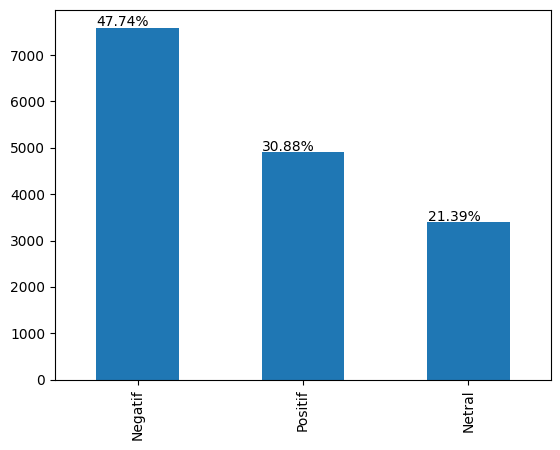

In [8]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar()
n = len(tweet_df.index)
print(n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n*100, 2)) + '%', (p.get_x() * 1.005, p.get_height() *1.005))

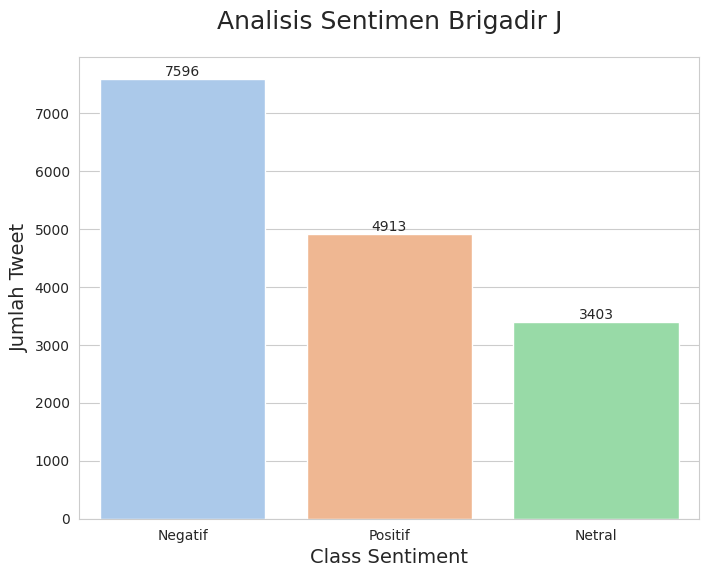

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the number of each sentiment
sentiment_count = tweet_df['Sentiments'].value_counts()

# set plot style
sns.set_style('whitegrid')

# create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Analisis Sentimen Brigadir J', fontsize=18, pad=20)
plt.xlabel('Class Sentiment',fontsize=14)
plt.ylabel('Jumlah Tweet', fontsize=14)

# add labels above each bar
for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()